## Condy Kan
# Final Exam

### Question:
 1. Is there a relationship between Median Age and the Likeihood of Death in 2010-2016, if so which median age of gender has the stronger correlation with the Likeihood of Death?
       
We would analyze the data and see if there is a relationship between Median Age and the Likeihood of Death. There are several factors that may affect likeihood of death, we wonder if Median Age is one of them. We would take male median age and female median age into consideration as well. It is important to identify the factors so we can find solutions to lower the likeihood of death.  In order to find the correlations, we would need a population data, along with median age information. 

### Data:
   - The provided data contains on the causes of death and the addtional data contains United States' population.
   - The ACIS 1-Year Estimates Subject Tables of 2010-2016 is obtained from U.S. Census Bureau
   - Each data from the individual year (2010-2016) is found in the link:
   <!-- [Text](link) -->
[Here](https://data.census.gov/cedsci/table?g=0100000US.04000.001&t=Age%20and%20Sex%3APopulations%20and%20People&tid=ACSST1Y2018.S0101&hidePreview=true&vintage=2018&layer=VT_2018_040_00_PY_D1&cid=S0101_C01_001E&moe=false&tp=false, "Here")
     
### Requirement:
   - State and explain your question.
   - Collect addtional data
   - Conduct analysis and produce a report. 

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

The provided data contains on the causes of death is imported in this notebook.

In [285]:
dir ='C:/Users/Condy/Desktop/Spring2020/BANA680/'
myfile1 = 'NCHS_-_Leading_Causes_of_Death__United_States.csv'
deathDF= pd.read_csv(dir+myfile1)
deathDF.head(5)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


The data sets of 2010-2016 from U.S. Census Bureau are extracted. We found that State, Total Population, Median Age, Male Median Age, and Female Median Age infomation useful for this analysis. Since we would like to merge two data sets, we kept infomation that they have in common. We kept the states and dropped Puerto Rico.  

In [308]:
keep = ['NAME','S0101_C01_001E', "S0101_C01_030E", "S0101_C02_030E", "S0101_C03_030E"]
dropStates =['Puerto Rico']
dic = {"NAME": "State", "S0101_C01_001E": "Total Population","S0101_C01_030E": "Median_Age", "S0101_C02_030E" : "Male Median_Age", "S0101_C03_030E": "Female Median_Age"}

In [292]:
myfilea = '2010.csv'
dfa = pd.read_csv(dir+myfilea)
dfa = dfa[~dfa['NAME'].isin(dropStates)].drop(index = [0], axis=1)
df2a = dfa[keep].copy()
df2a["Year"] = 2010
df2a = df2a.rename(columns=dic)
myfileb = '2011.csv'
dfb = pd.read_csv(dir+myfileb)
dfb = dfb[~dfb['NAME'].isin(dropStates)].drop(index = [0], axis=1)
df2b = dfb[keep].copy()
df2b["Year"] = 2011
df2b = df2b.rename(columns=dic)
myfilec = '2012.csv'
dfc = pd.read_csv(dir+myfilec)
dfc = dfc[~dfc['NAME'].isin(dropStates)].drop(index = [0], axis=1)
df2c = dfc[keep].copy()
df2c["Year"] = 2012
df2c = df2c.rename(columns=dic)
myfiled = '2013.csv'
dfd = pd.read_csv(dir+myfiled)
dfd = dfd[~dfd['NAME'].isin(dropStates)].drop(index = [0], axis=1)
df2d = dfd[keep].copy()
df2d["Year"] = 2013
df2d = df2d.rename(columns=dic)
myfilee = '2014.csv'
dfe = pd.read_csv(dir+myfilee)
dfe = dfe[~dfe['NAME'].isin(dropStates)].drop(index = [0], axis=1)
df2e = dfe[keep].copy()
df2e["Year"] = 2014
df2e = df2e.rename(columns=dic)
myfilef = '2015.csv'
dff = pd.read_csv(dir+myfilef)
dff = dff[~dff['NAME'].isin(dropStates)].drop(index = [0], axis=1)
df2f = dff[keep].copy()
df2f["Year"] = 2015
df2f = df2f.rename(columns=dic)
myfileg = '2016.csv'
dfg = pd.read_csv(dir+myfileg)
dfg = dfg[~dfg['NAME'].isin(dropStates)].drop(index = [0], axis=1)
df2g = dfg[keep].copy()
df2g["Year"] = 2016
df2g = df2g.rename(columns=dic)

After obtaining and cleaning the seven data sets, they are concatenated together into one population data. 

In [312]:
frames = [df2a, df2b, df2c, df2d, df2e, df2f, df2g]
popDF = pd.concat(frames)
popDF.reset_index(drop=True, inplace=True)
popDF['Total Population'] = popDF['Total Population'].astype(int)
popDF['Median_Age'] = popDF['Median_Age'].astype(float)
popDF['Male Median_Age'] = popDF['Male Median_Age'].astype(float)
popDF['Female Median_Age'] = popDF['Female Median_Age'].astype(float)
popDF.head(5)

,State,Total Population,Median_Age,Male Median_Age,Female Median_Age,Year
0,Alabama,4785298,37.8,36.4,39.1,2010
1,Alaska,713985,33.8,33.5,34.2,2010
2,Arizona,6413737,35.9,34.8,37.1,2010
3,Arkansas,2921606,37.3,36.1,38.5,2010
4,California,37349363,35.2,34.0,36.3,2010


Then, we merged the two data sets (the provided data with causes information and the population data), using an inner join. Both data have two similar columns, which are year and state. Since we got 2010-2016 population data, we would able to analyze total population and median-age between 2010-2016 in the merged data.

In [294]:
mergedData = pd.merge(deathDF, popDF, on=["Year","State"], how='inner')
mergedData.iloc[np.r_[0:5, -5:0]]

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Total Population,Median_Age,Male Median_Age,Female Median_Age
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6,626011,42.4,41.0,43.7
1,2012,Influenza and pneumonia (J09-J18),Influenza and pneumonia,Vermont,81,9.9,626011,42.4,41.0,43.7
2,2012,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Vermont,87,13.0,626011,42.4,41.0,43.7
3,2012,Diabetes mellitus (E10-E14),Diabetes,Vermont,168,21.4,626011,42.4,41.0,43.7
4,2012,Alzheimer's disease (G30),Alzheimer's disease,Vermont,284,35.3,626011,42.4,41.0,43.7
3922,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1538,49.6,2978204,37.9,36.6,39.3
3923,2015,Chronic lower respiratory diseases (J40-J47),CLRD,Arkansas,2270,62.4,2978204,37.9,36.6,39.3
3924,2015,Malignant neoplasms (C00-C97),Cancer,Arkansas,6727,185.4,2978204,37.9,36.6,39.3
3925,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arkansas,7938,223.2,2978204,37.9,36.6,39.3
3926,2015,All Causes,All causes,Arkansas,31617,901.8,2978204,37.9,36.6,39.3


We averaged the mean of median age, male median age, and female median age within a year. In this way, we would be able to see the changes in Median Ages. 

In [296]:
keep = ['Year','Deaths', "Total Population", "Median_Age", "Male Median_Age", "Female Median_Age"]
dfLikeihood1 = mergedData[keep].copy()
grouped1 = dfLikeihood1.groupby(['Year'])
dfLikeihood1 = grouped1[["Median_Age", "Male Median_Age", "Female Median_Age"]].mean().reset_index()
dfLikeihood1

,Year,Median_Age,Male Median_Age,Female Median_Age
0,2010,37.545098,36.298039,38.750980
1,2011,37.662745,36.407843,38.913725
2,2012,37.778431,36.529412,39.015686
3,2013,37.849020,36.594118,39.094118
4,2014,37.972549,36.719608,39.245098
5,2015,38.080392,36.837255,39.341176
6,2016,38.247059,36.998039,39.501961


Based on the dataframe above, we may conclude that the Nation's median age rose from 2010 to 2016. 

Now, the numbers of deaths and total poplutions are summed up by a year and all causes. The total population would be divided by deaths to obtain the Rate of Likeihood of Death. 

In [297]:
keep = ['Year','Deaths', 'Cause Name', "Total Population"]
dfLikeihood2 = mergedData[keep].copy()
dfLikeihood2 = dfLikeihood2.loc[(dfLikeihood2['Cause Name'] == 'All causes')]
grouped2 = dfLikeihood2.groupby(['Year','Cause Name'])
dfLikeihood2 = grouped[['Deaths','Total Population']].sum().reset_index()
dfLikeihood2['Rate_of_Likeihood_of_Death'] = (dfLikeihood2['Deaths']/dfLikeihood2['Total Population'])*100
dfLikeihood2

,Year,Cause Name,Deaths,Total Population,Rate_of_Likeihood_of_Death
0,2010,All causes,2468435,309349689,0.797943
1,2011,All causes,2515458,311591919,0.807292
2,2012,All causes,2543279,313914040,0.810183
3,2013,All causes,2596993,316128839,0.821498
4,2014,All causes,2626418,318857056,0.823698
5,2015,All causes,2712630,321418821,0.843955
6,2016,All causes,2744248,323127515,0.849277


Similar to Median Age, the rate of likeihood of death slightly rose. Then the both datafames are merged to understand the relationship. Both Median Ages and Rate of Likeihood of Death increased by a year.

In [304]:
df = pd.merge(dfLikeihood1, dfLikeihood2, on=["Year"], how='inner').drop(columns=["Deaths", "Total Population", "Cause Name"])
df

,Year,Median_Age,Male Median_Age,Female Median_Age,Rate_of_Likeihood_of_Death
0,2010,37.545098,36.298039,38.750980,0.797943
1,2011,37.662745,36.407843,38.913725,0.807292
2,2012,37.778431,36.529412,39.015686,0.810183
3,2013,37.849020,36.594118,39.094118,0.821498
4,2014,37.972549,36.719608,39.245098,0.823698
5,2015,38.080392,36.837255,39.341176,0.843955
6,2016,38.247059,36.998039,39.501961,0.849277


Now, they are plotted and both have positive correlations with year as well. All variables have the similar relationships. 

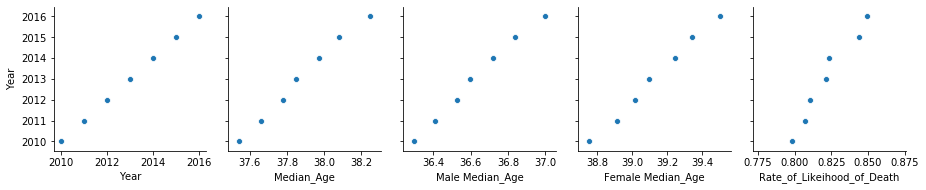

In [307]:
for i in range(0,len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=["Year"])
plt.show()

We also may conclude that there is a strong positive correlation between median age and rate of likeihood of death. Not only median age but also, year has a strong correlation with rate of likeihood of death. Plus, we compare the correlations between Rate of Likeihood_of_Death and Male/Female Median Age. 

In [283]:
df.corr()

,Year,Median_Age,Male Median_Age,Female Median_Age,Rate_of_Likeihood_of_Death
Year,1.000000,0.995855,0.995589,0.996368,0.978444
Median_Age,0.995855,1.000000,0.999850,0.998319,0.976848
Male Median_Age,0.995589,0.999850,1.000000,0.997608,0.978250
Female Median_Age,0.996368,0.998319,0.997608,1.000000,0.972824
Rate_of_Likeihood_of_Death,0.978444,0.976848,0.978250,0.972824,1.000000


Even though the correlations are indeed close, we may conclude that the association between rate of likeihood of death and male median age is comparatively stronger than female median age by 0.005. 

The correlation analysis is powerful when we want to find the possible associations between features, in this case median ages and rate of likeihood of death. This allowed me to understand the feature-feature relationships. We learned that median age of genders and the rate have strong positive relationships. We can be more certain that age, and perhaps gender are the factors of causes. Also this analysis may help with estimating the rate of likehihood of death in future.  Overall, I gained more hand-on experiences with statistical analyses and able to understand that it can be used in many real-world applications such as researching or building good models. 